<a href="https://colab.research.google.com/github/nquockhanh0209/XAI/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Labeling and clean data

In [ ]:
import pandas as pd
df = pd.read_csv('raw_data.csv')
for column in df.columns:
    for i, value in enumerate(df[column]):
        if pd.isna(value):

            # df.at[i, column] = df[column].mean()
            df.at[i, column] = 0


Y = []
# train_data_file = 'dataset_train.csv'

# df_train = pd.read_csv(train_data_file)
def output_cal(row):
    y = 1.03 * row['X1'] + 3.07 * row['X5'] + 0.66 * row['X8'] + 0.4 * row['X6']
    if(y > 0.862):
      return 0
    else:
      return 1
for index, row in df.iterrows():
    y = output_cal(row)

    Y.append(y)


df['Y'] = Y

df_train = df[df['Year'].isin([2017, 2018, 2019])]

test_data_file = 'dataset_test.csv'
df_test = df[df['Year'].isin([2020, 2021])]
# df_test.to_csv(test_data_file, index=False)

In [ ]:
y_train = df_train['Y'].tolist()
# X_train = df_train[['X1', 'X2', 'X3', 'X4', 'X5', 'X8', 'X6']].to_numpy()
df_train = df_train.drop(['Year', 'Ticker', 'X1', 'X2', 'X3', 'X4', 'X5', 'X8', 'X6', 'Y'], axis=1)
X_train = df_train.to_numpy()

print(y_train)
print(X_train.shape)
df_test = df_test.drop(['Year', 'Ticker'], axis=1)
X_full = df_test.to_numpy()
y_test = df_test['Y'].tolist()
df_test = df_test.drop(['X1', 'X2', 'X3', 'X4', 'X5', 'X8', 'X6', 'Y'], axis=1)
X_test = df_test.to_numpy()

print(X_test.shape)
# X_test = filtered_df_test[['X1', 'X2', 'X3', 'X4', 'X5', 'X8', 'X6']].to_numpy()


[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:09:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9228
Precision: 0.8979
Recall: 0.9153
F1 Score: 0.9065
ROC AUC Score: 0.9787
Gini Score: 0.9573

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       597
           1       0.90      0.92      0.91       413

    accuracy                           0.92      1010
   macro avg       0.92      0.92      0.92      1010
weighted avg       0.92      0.92      0.92      1010

Confusion Matrix:
[[554  43]
 [ 35 378]]


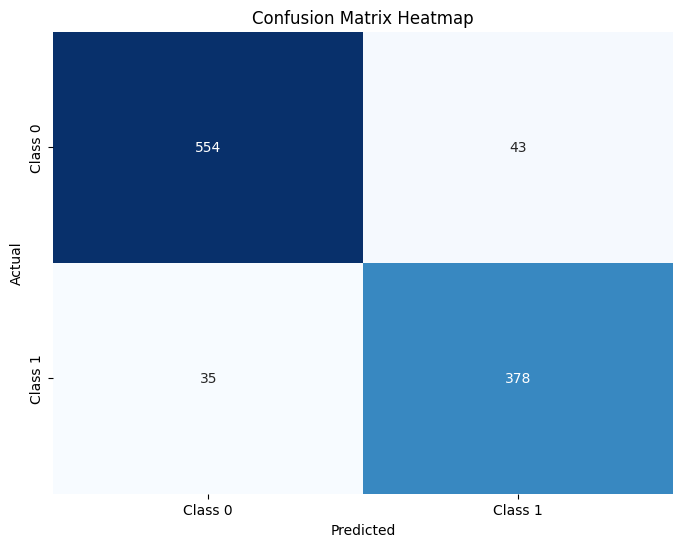

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Initialize and train the model
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
gini_score = 2 * roc_auc - 1

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Gini Score: {gini_score:.4f}\n")

# Optional: Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Define class names
class_names = ['Class 0', 'Class 1']

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
pip install --upgrade shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.8 MB/s eta 0:00:00


17it [00:28,  2.63s/it]


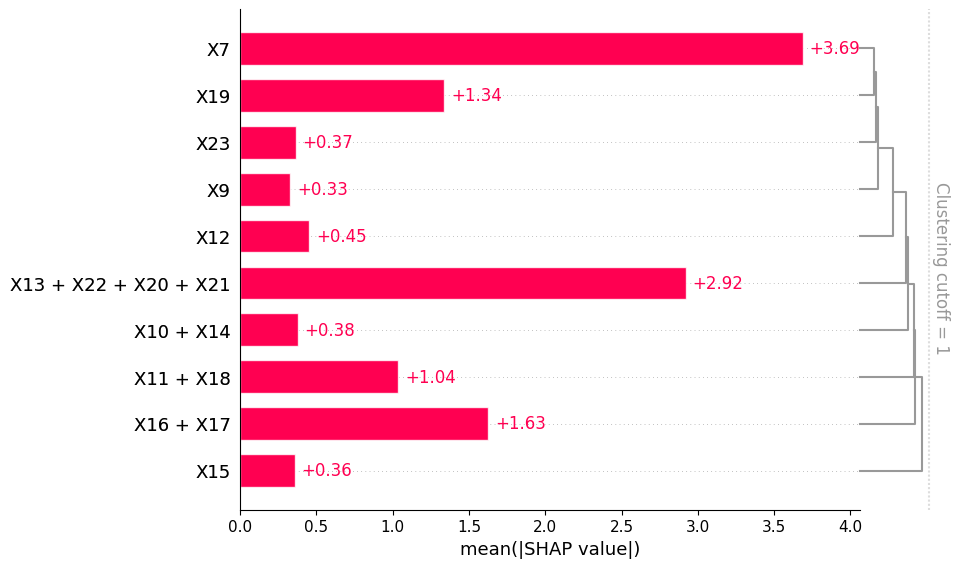

In [ ]:
import shap
import xgboost as xgb


explainer = shap.Explainer(model)
shap_values = explainer(df_train)

clust = shap.utils.hclust(X_train, y_train, linkage="single")
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

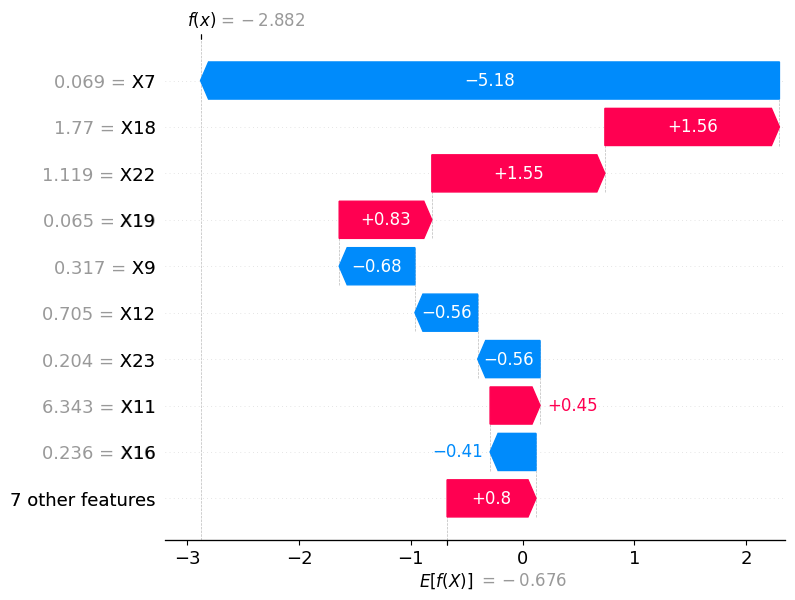

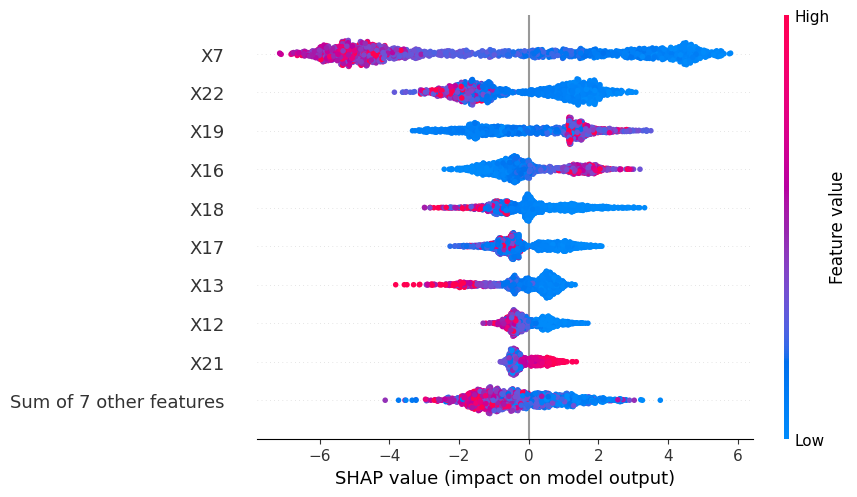

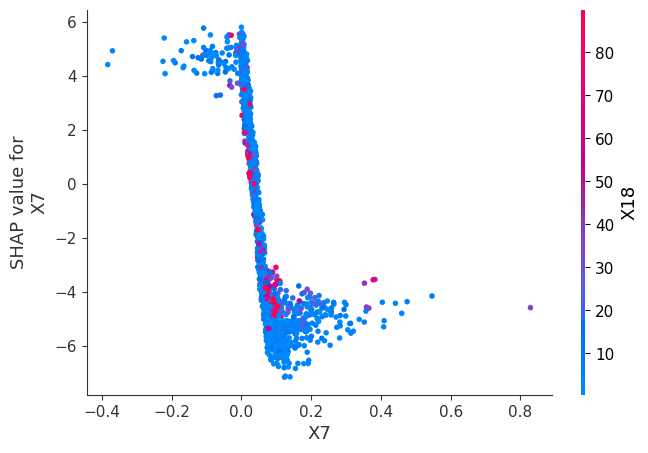

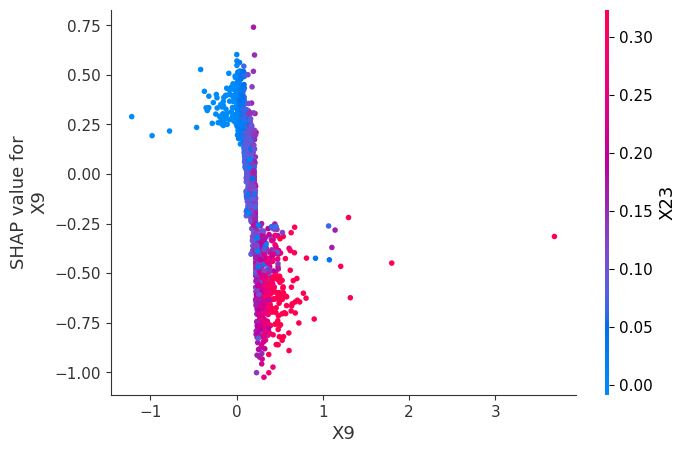

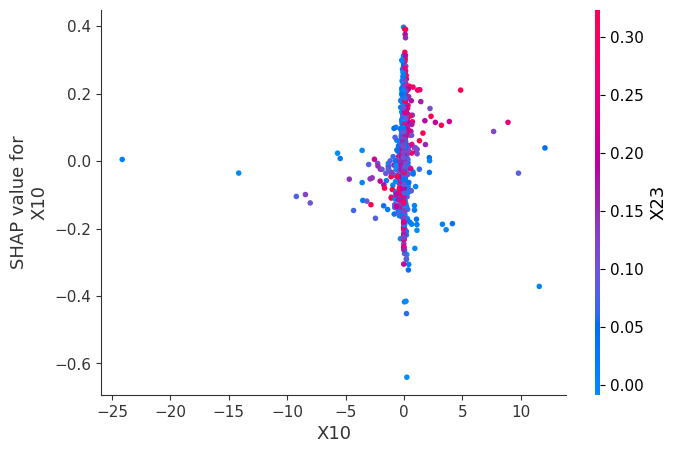

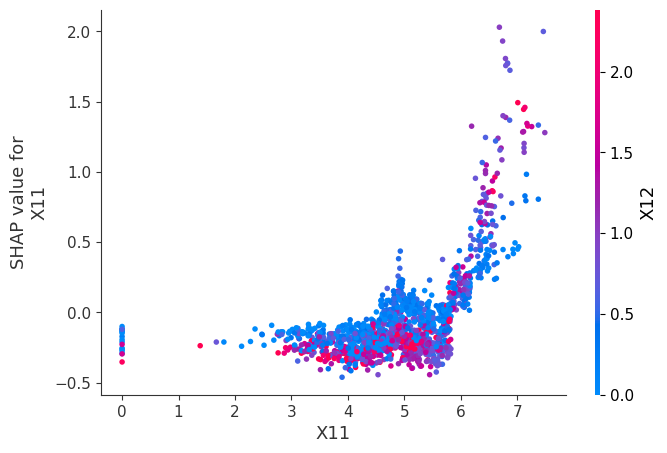

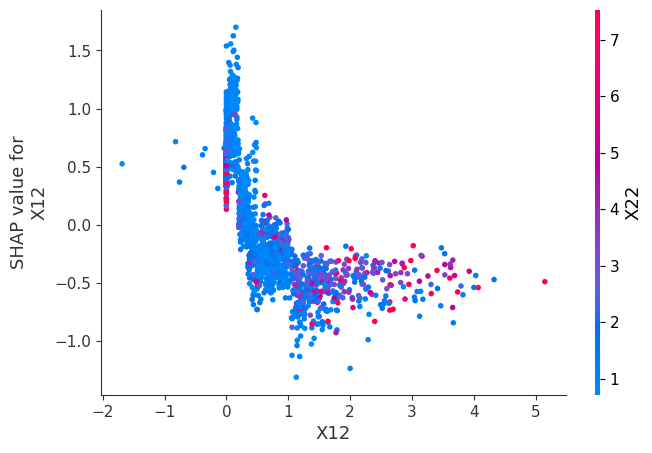

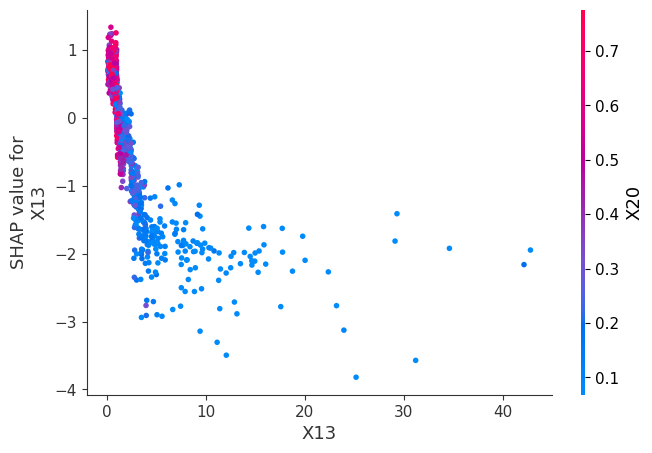

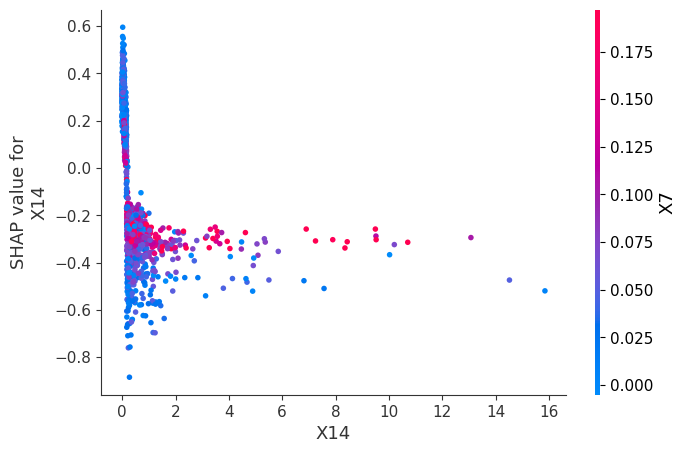

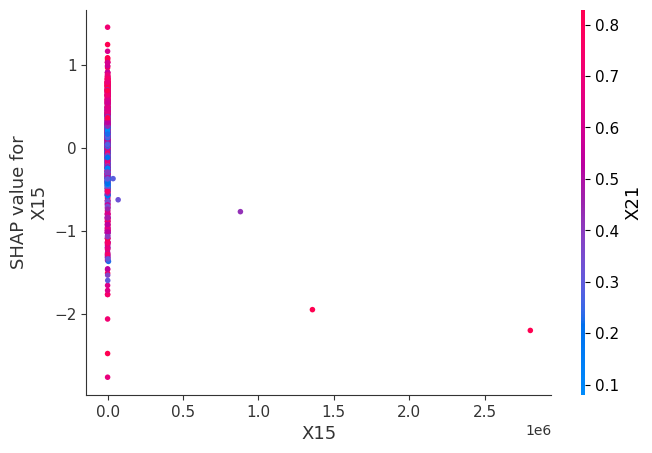

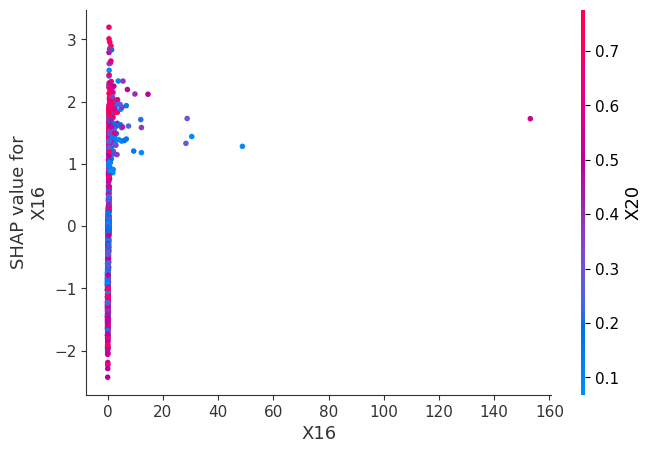

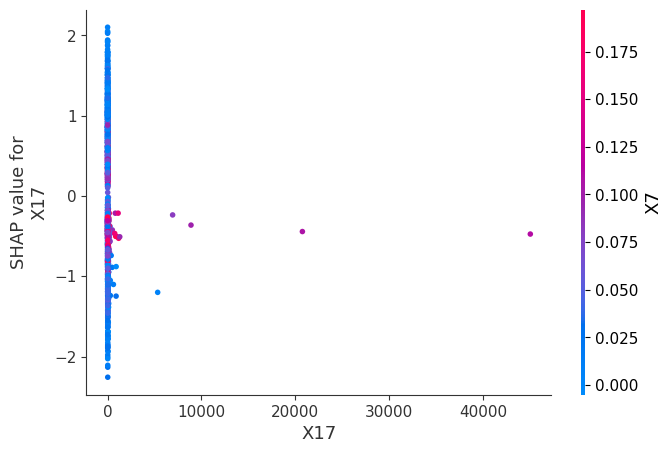

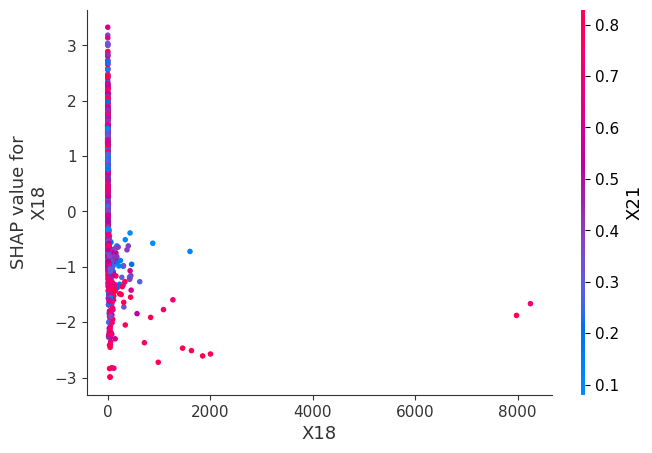

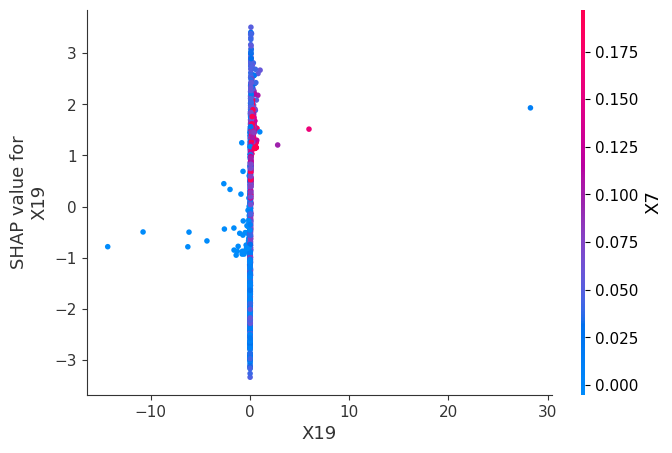

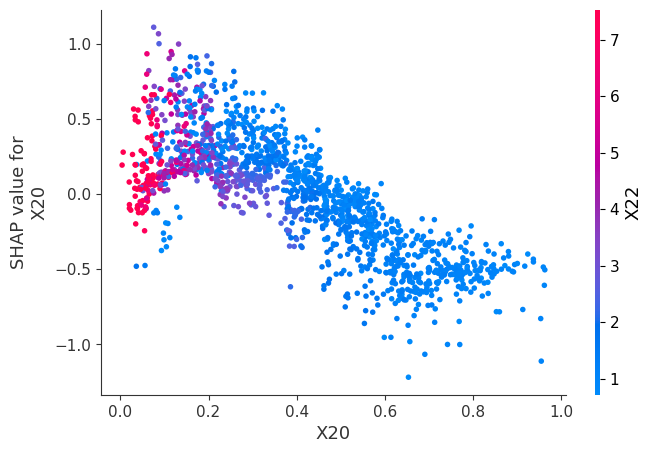

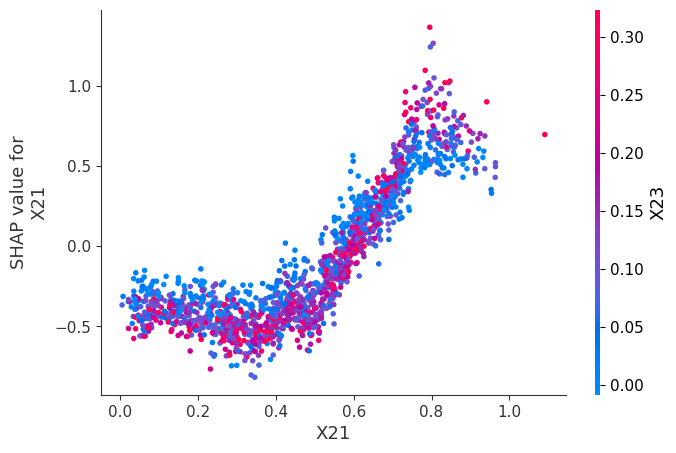

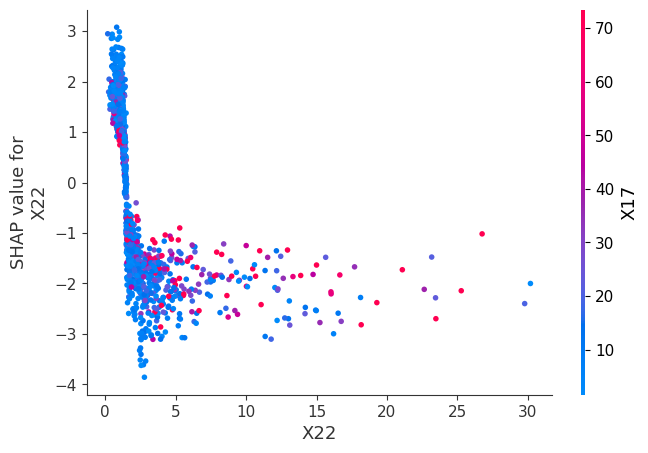

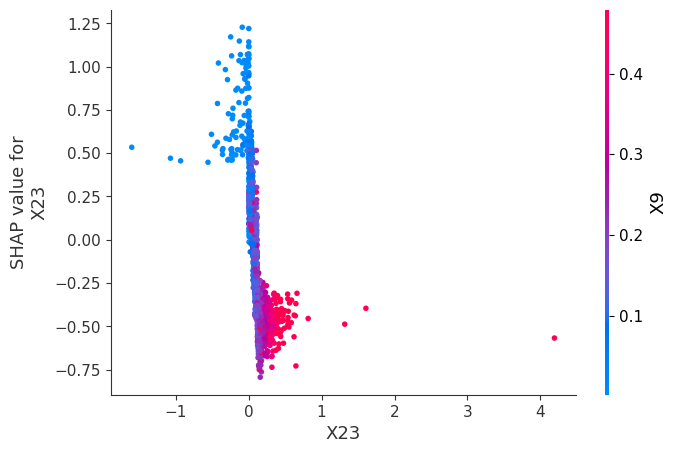

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=10, show=True)
shap.plots.beeswarm(shap_values)
for i in range(16):
  shap.dependence_plot(i, shap_values.values, df_train)